In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from data_processing import *
from utils import feature_desc

from sklearn.preprocessing import StandardScaler

#### Load data

In [7]:
df_og = load(csv_path = '../data/merged.csv')

#### Aggregate time into clusters of size k

In [8]:
k = 15
df_og = aggregate(df_og, k)

/home/kacper/studia/cuvalley/src/data_processing/data_processing.py:126: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if not type(agg_df['czas']) is pd.datetime:


### Proste featury wybieram albo tworze agregując


In [34]:
df = pd.DataFrame(index=df_og.index)

In [35]:
# srednia po 'WODY POWROTNE KOLEKTORÓW [°C]'
TIR = df_og.columns[df_og.columns.str.contains('tir')].values
df['TIR'] = df_og[TIR].mean(axis='columns')

# srednia po 'TEMP POD 2 WARSTWĄ WYMURÓWKI [°C]'
TIX1 = df_og.columns[df_og.columns.str.contains('001tix')].values
df['TIX1'] = df_og[TIX1].mean(axis='columns')

# prob_s i prob_corg
PR = ['prob_s', 'prob_corg']
df[PR] = df_og[PR]

# reg nadawy koncentratu
FCX = df_og.columns[df_og.columns.str.contains('fcx')].values
df['FCX'] = df_og[FCX].mean(axis='columns')

# sumaryczna moc cieplna
NIR = df_og.columns[df_og.columns.str.contains('nir')].values
df['NIR'] = df_og[NIR]

# WENT ODCZ ZAD OBROTÓW
UXM = df_og.columns[df_og.columns.str.contains('uxm')].values
df['UXM'] = df_og[UXM].mean(axis='columns')

lagged_df = df.copy()

for i in range(60 // k):
    lagged_df = pd.concat([lagged_df, df.shift(i+1).add_prefix(f'{i+1}th_agg_')], axis=1)

# delete rows with nans created by shifts
lagged_df = lagged_df.iloc[(60 // k):, :]

df = lagged_df.copy()

# dodanie temperatury żużla
df["temp_zuz"] = df_og["temp_zuz"]

In [36]:
df

,TIR,TIX1,prob_s,prob_corg,FCX,NIR,UXM,1th_agg_TIR,1th_agg_TIX1,1th_agg_prob_s,...,3th_agg_NIR,3th_agg_UXM,4th_agg_TIR,4th_agg_TIX1,4th_agg_prob_s,4th_agg_prob_corg,4th_agg_FCX,4th_agg_NIR,4th_agg_UXM,temp_zuz
czas,,,,,,,,,,,,,,,,,,,,,
2020-09-30 23:00:00+00:00,28.976641,418.922325,9.870000,8.600,36.089802,14.928113,92.183384,28.985093,418.945132,9.870000,...,14.442679,92.173710,29.086390,418.990965,9.870000,8.600,36.478403,14.362428,92.173271,1295.0
2020-09-30 23:15:00+00:00,29.003159,418.899095,9.870000,8.600,35.814912,15.030486,92.188098,28.976641,418.922325,9.870000,...,14.662764,92.173332,29.076544,418.983679,9.870000,8.600,36.070798,14.442679,92.173710,NaN
2020-09-30 23:30:00+00:00,28.956846,418.875753,9.870000,8.600,35.818278,15.078700,92.179840,29.003159,418.899095,9.870000,...,14.815845,92.175384,29.034362,418.967003,9.870000,8.600,36.064529,14.662764,92.173332,NaN
2020-09-30 23:45:00+00:00,28.952925,418.852752,9.870000,8.600,35.643956,15.109401,92.182284,28.956846,418.875753,9.870000,...,14.928113,92.183384,28.985093,418.945132,9.870000,8.600,36.102749,14.815845,92.175384,NaN
2020-10-01 00:00:00+00:00,28.977891,418.830454,9.870000,8.600,35.183596,15.156648,92.185646,28.952925,418.852752,9.870000,...,15.030486,92.188098,28.976641,418.922325,9.870000,8.600,36.089802,14.928113,92.183384,1303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31 22:00:00+00:00,27.821735,417.873880,11.340667,7.744,38.375717,17.008732,98.119134,27.813086,417.892097,11.260000,...,15.791206,98.122352,27.700593,417.947976,11.260000,7.740,38.903288,16.388216,98.123632,1309.0
2022-01-31 22:15:00+00:00,27.806447,417.855750,12.470000,7.800,38.397756,15.958556,98.123193,27.821735,417.873880,11.340667,...,15.457723,98.120949,27.741460,417.929314,11.260000,7.740,38.881983,15.791206,98.122352,NaN
2022-01-31 22:30:00+00:00,27.764780,417.837620,12.470000,7.800,38.372137,17.435048,98.125206,27.806447,417.855750,12.470000,...,17.248088,98.121136,27.834004,417.910653,11.260000,7.740,38.609579,15.457723,98.120949,NaN


## Generalnie to wyrzucam outlierów

In [37]:
df = df.loc[(df_og.temp_zuz < 1319) & (df_og.temp_zuz > 1278)]

In [38]:
df = pd.concat([df, df[['temp_zuz']].shift(1).add_prefix('poprzednia_')], axis=1)

df = df.iloc[1:, :]

In [39]:
df

,TIR,TIX1,prob_s,prob_corg,FCX,NIR,UXM,1th_agg_TIR,1th_agg_TIX1,1th_agg_prob_s,...,3th_agg_UXM,4th_agg_TIR,4th_agg_TIX1,4th_agg_prob_s,4th_agg_prob_corg,4th_agg_FCX,4th_agg_NIR,4th_agg_UXM,temp_zuz,poprzednia_temp_zuz
czas,,,,,,,,,,,,,,,,,,,,,
2020-10-01 00:00:00+00:00,28.977891,418.830454,9.870000,8.600000,35.183596,15.156648,92.185646,28.952925,418.852752,9.87,...,92.188098,28.976641,418.922325,9.870000,8.600000,36.089802,14.928113,92.183384,1303.0,1295.0
2020-10-01 00:30:00+00:00,29.046185,418.786949,9.870000,8.600000,35.205675,14.950386,92.193423,29.035016,418.808284,9.87,...,92.182284,28.956846,418.875753,9.870000,8.600000,35.818278,15.078700,92.179840,1302.0,1303.0
2020-10-01 01:00:00+00:00,29.075386,418.745197,9.861333,8.600667,35.476678,14.636254,92.191058,29.063975,418.766188,9.87,...,92.189435,28.977891,418.830454,9.870000,8.600000,35.183596,15.156648,92.185646,1303.0,1302.0
2020-10-01 02:00:00+00:00,29.086309,418.659694,9.740000,8.610000,35.926535,14.317483,92.191423,29.086589,418.681755,9.74,...,92.190417,29.075386,418.745197,9.861333,8.600667,35.476678,14.636254,92.191058,1306.0,1303.0
2020-10-01 03:00:00+00:00,28.938398,418.577149,9.740000,8.610000,36.472945,13.753565,92.187570,28.978544,418.595758,9.74,...,92.192651,29.086309,418.659694,9.740000,8.610000,35.926535,14.317483,92.191423,1303.0,1306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31 18:00:00+00:00,27.672470,418.301906,12.156000,7.646667,39.861362,15.039471,98.141070,27.640142,418.344075,12.22,...,98.146641,27.354800,418.509892,12.220000,7.640000,39.866944,17.435685,98.137671,1300.0,1294.0
2022-01-31 19:00:00+00:00,27.789027,418.155118,11.260000,7.740000,39.822903,14.866901,98.141912,27.782086,418.191546,11.26,...,98.144224,27.672470,418.301906,12.156000,7.646667,39.861362,15.039471,98.141070,1305.0,1300.0
2022-01-31 20:00:00+00:00,27.785259,418.020862,11.260000,7.740000,39.628239,16.534342,98.144293,27.739525,418.044800,11.26,...,98.139574,27.789027,418.155118,11.260000,7.740000,39.822903,14.866901,98.141912,1304.0,1305.0


<AxesSubplot:xlabel='czas', ylabel='temp_zuz'>

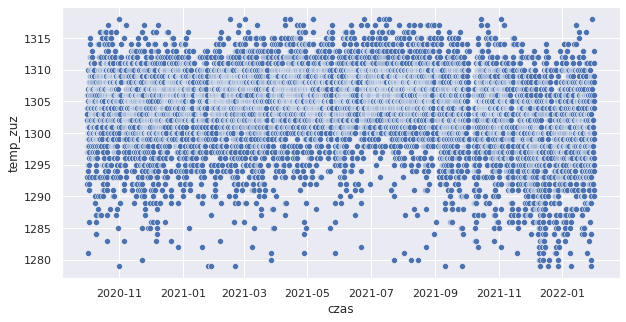

In [40]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.scatterplot(data=df, x='czas', y="temp_zuz")

## Split into train, val and test sets

In [41]:
df1, df2, df3 = split(df, proportions=(0.7, 0.15, 0.15))

## Eventually you scale the data as follows

In [42]:
df1.head(3)

,TIR,TIX1,prob_s,prob_corg,FCX,NIR,UXM,1th_agg_TIR,1th_agg_TIX1,1th_agg_prob_s,...,3th_agg_UXM,4th_agg_TIR,4th_agg_TIX1,4th_agg_prob_s,4th_agg_prob_corg,4th_agg_FCX,4th_agg_NIR,4th_agg_UXM,temp_zuz,poprzednia_temp_zuz
czas,,,,,,,,,,,,,,,,,,,,,
2020-10-01 00:00:00+00:00,28.977891,418.830454,9.870000,8.600000,35.183596,15.156648,92.185646,28.952925,418.852752,9.87,...,92.188098,28.976641,418.922325,9.87,8.6,36.089802,14.928113,92.183384,1303.0,1295.0
2020-10-01 00:30:00+00:00,29.046185,418.786949,9.870000,8.600000,35.205675,14.950386,92.193423,29.035016,418.808284,9.87,...,92.182284,28.956846,418.875753,9.87,8.6,35.818278,15.078700,92.179840,1302.0,1303.0
2020-10-01 01:00:00+00:00,29.075386,418.745197,9.861333,8.600667,35.476678,14.636254,92.191058,29.063975,418.766188,9.87,...,92.189435,28.977891,418.830454,9.87,8.6,35.183596,15.156648,92.185646,1303.0,1302.0


In [43]:
dfs, mean, scale = scale(df1, df2, df3)

TypeError: 'numpy.ndarray' object is not callable

In [44]:
df1, df2, df3 = dfs

In [45]:
df1.head(3)

,TIR,TIX1,prob_s,prob_corg,FCX,NIR,UXM,1th_agg_TIR,1th_agg_TIX1,1th_agg_prob_s,...,3th_agg_UXM,4th_agg_TIR,4th_agg_TIX1,4th_agg_prob_s,4th_agg_prob_corg,4th_agg_FCX,4th_agg_NIR,4th_agg_UXM,temp_zuz,poprzednia_temp_zuz
czas,,,,,,,,,,,,,,,,,,,,,
2020-10-01 00:00:00+00:00,28.977891,418.830454,9.870000,8.600000,35.183596,15.156648,92.185646,0.171931,0.007601,-1.551888,...,-0.295098,0.205648,0.020374,-1.554932,-0.56198,0.063692,-1.781138,-0.291212,1303.0,NaN
2020-10-01 00:30:00+00:00,29.046185,418.786949,9.870000,8.600000,35.205675,14.950386,92.193423,0.280438,0.001090,-1.551888,...,-0.296033,0.179508,0.013577,-1.554932,-0.56198,-0.003161,-1.735292,-0.291777,1302.0,NaN
2020-10-01 01:00:00+00:00,29.075386,418.745197,9.861333,8.600667,35.476678,14.636254,92.191058,0.318716,-0.005074,-1.551888,...,-0.294883,0.207298,0.006966,-1.554932,-0.56198,-0.159430,-1.711560,-0.290852,1303.0,NaN


## Data is now ready to do somthing with it

In [46]:
df1.to_csv('../data/train.csv')
df2.to_csv('../data/test.csv')
df3.to_csv('../data/val.csv')

In [47]:
df.to_csv('../data/clear.csv')